# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.




#### The observations from this data are:
* The max temperature is positively correlated with latitude in southern hemisphere and negative correlated in northern hemisphere. Across both the hemisphere, it follows a bell curve districution.
* There is no correlation betwen humidity and latitude overall or in each hemispheres.
* There is no correlation betwen cloudiness and latitude overall or in each hemispheres.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#cities

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_weather_url=f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q="

#response=requests.get(base_weather_url+city).json()
#print(base_weather_url)

#response=requests.get(base_weather_url+"saleaula"+"&units=imperial")#.json()
#print(response.status_code)

#requests.get(base_weather_url+"saleaula"+"&units=imperial")#.json()

print("Beginning Data Retrieval")
print("----------------------------")

for index in range(len(cities)):

    response=requests.get(base_weather_url+cities[index]).json()
    
    try:
        
        cities_found=response["name"]
        print(f"Processing Record {index+1} | {cities_found}")
     
    except:
        print(f"City {cities[index]} not found")
        

Beginning Data Retrieval
----------------------------
Processing Record 1 | Hithadhoo
Processing Record 2 | Vaini
City taolanaro not found
Processing Record 4 | Araouane
Processing Record 5 | Provideniya
Processing Record 6 | Youghal
Processing Record 7 | Channel-Port aux Basques
Processing Record 8 | Cape Town
Processing Record 9 | Zhalantun
Processing Record 10 | Busselton
City bolungarvik not found
Processing Record 12 | Cocobeach
Processing Record 13 | Sitka
Processing Record 14 | Ust-Tsilma
Processing Record 15 | Comodoro Rivadavia
Processing Record 16 | Praia
Processing Record 17 | Esperance
Processing Record 18 | Forestville
Processing Record 19 | Port Alfred
Processing Record 20 | Puerto Ayora
Processing Record 21 | Qaqortoq
City barentsburg not found
Processing Record 23 | Orapa
Processing Record 24 | Hermanus
Processing Record 25 | Olafsvik
Processing Record 26 | Dinard
Processing Record 27 | Ambilobe
Processing Record 28 | Hobart
Processing Record 29 | George Town
Processing

Processing Record 256 | Cockburn Town
Processing Record 257 | Pevek
Processing Record 258 | Ust'-Omchug
Processing Record 259 | Antsohihy
City tasbuget not found
Processing Record 261 | São Filipe
Processing Record 262 | Helena
Processing Record 263 | Hervey Bay
Processing Record 264 | Bani Walid
Processing Record 265 | Aripuanã
Processing Record 266 | Uray
Processing Record 267 | San Andrés
Processing Record 268 | Gallup
Processing Record 269 | Nemuro
Processing Record 270 | Alta Floresta
Processing Record 271 | Tegul'det
Processing Record 272 | Novikovo
Processing Record 273 | Tomelloso
Processing Record 274 | Bavly
Processing Record 275 | Port Lincoln
City vaitupu not found
Processing Record 277 | Nishihara
Processing Record 278 | Kamenka
Processing Record 279 | Ponta do Sol
Processing Record 280 | Zeya
Processing Record 281 | Churapcha
Processing Record 282 | Verkhoyansk
Processing Record 283 | Palu
Processing Record 284 | Ribnitz-Damgarten
Processing Record 285 | Namatanai
Process

Processing Record 503 | Esqueda
Processing Record 504 | Umm Hājar
Processing Record 505 | Along
Processing Record 506 | Mackenzie
Processing Record 507 | Illapel
City sataua not found
Processing Record 509 | Broken Hill
Processing Record 510 | Gogrial
Processing Record 511 | Northam
Processing Record 512 | Narrabri
Processing Record 513 | Houston
Processing Record 514 | Chimbote
Processing Record 515 | Lodja
Processing Record 516 | Lima
City utiroa not found
Processing Record 518 | Huainan
Processing Record 519 | Qaţanā
Processing Record 520 | Rongcheng
Processing Record 521 | Waingapu
Processing Record 522 | Deputatsky
Processing Record 523 | Burns Lake
Processing Record 524 | Mundo Nuevo (Ojo de Agua)
Processing Record 525 | Coquimbo
Processing Record 526 | Nampa
Processing Record 527 | Nirmal
Processing Record 528 | Piracanjuba
Processing Record 529 | Bandarbeyla
Processing Record 530 | Timrå
Processing Record 531 | Chipinge
Processing Record 532 | Tāki
Processing Record 533 | Trele

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_weather=pd.DataFrame({})
#cities_weather={}
cities_weather["City"]=[]
cities_weather["Lat"]=[]
cities_weather["Lng"]=[]
cities_weather["Max Temp"]=[]
cities_weather["Humidity"]=[]
cities_weather["Cloudiness"]=[]
cities_weather["Wind Speed"]=[]
cities_weather["Country"]=[]
cities_weather["Date"]=[]
cities_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [5]:
for i in range(len(cities)):
    
    response=requests.get(base_weather_url+cities[i]+"&units=imperial").json()
   
    try:
        
        cities_weather.loc[i,"City"]=response["name"]
        cities_weather.loc[i,"Lat"]=response["coord"]["lat"]
        cities_weather.loc[i,"Lng"]=response["coord"]["lon"]
        cities_weather.loc[i,"Max Temp"]=response["main"]["temp_max"]
        cities_weather.loc[i,"Humidity"]=response["main"]["humidity"]
        cities_weather.loc[i,"Cloudiness"]=response["clouds"]["all"]
        cities_weather.loc[i,"Wind Speed"]=response["wind"]["speed"]
        cities_weather.loc[i,"Country"]=response["sys"]["country"]
        cities_weather.loc[i,"Date"]=str(response["dt"])
        
    except:
        pass


In [6]:
cities_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.60,73.08,84.85,70.0,79.0,8.43,MV,1593153683
1,Vaini,-21.20,-175.20,75.20,83.0,75.0,5.82,TO,1593153988
3,Araouane,18.90,-3.53,92.25,23.0,50.0,9.91,ML,1593154069
4,Provideniya,64.38,-173.30,44.60,65.0,75.0,15.66,RU,1593153983
5,Youghal,51.95,-7.85,60.01,87.0,75.0,4.70,IE,1593154069


In [7]:
cities_weather.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [8]:
cities_weather.to_csv("..\output_data\cities.csv",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
cities_weather.loc[cities_weather["Humidity"]>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.

cities_weather[cities_weather["Humidity"]>100].index

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data=cities_weather[cities_weather["Humidity"]<=100]

In [12]:
# Extract relevant fields from the data frame

clean_city_data.head()

# Export the City_Data into a csv
clean_city_data.to_csv("..\output_data\cities_clean.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

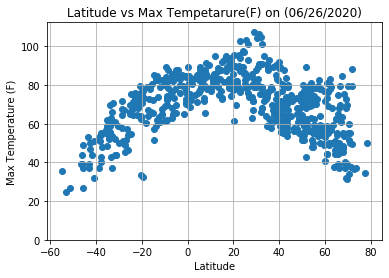

In [13]:
current_date=date.today().__format__('%m/%d/%Y')
x_axis=clean_city_data["Lat"]
y_axis=clean_city_data["Max Temp"]

fig1=plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude vs Max Tempetarure(F) on ({current_date})")
plt.ylim(0,max(clean_city_data["Max Temp"])+5)
plt.grid(True)

plt.savefig("..\output_data\lat_maxtemp.png")


## Latitude vs. Humidity Plot

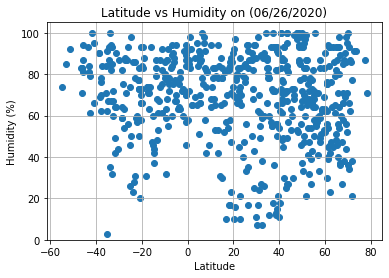

In [14]:
x_axis=clean_city_data["Lat"]
y_axis=clean_city_data["Humidity"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs Humidity on ({current_date})")
plt.ylim(0,max(clean_city_data["Humidity"])+5)
plt.grid(True)

plt.savefig("..\output_data\lat_humidity.png")

## Latitude vs. Cloudiness Plot

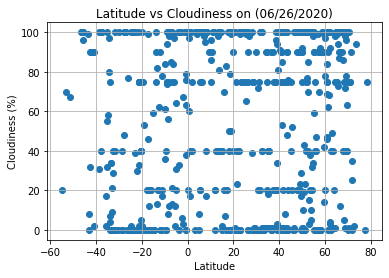

In [15]:
x_axis=clean_city_data["Lat"]
y_axis=clean_city_data["Cloudiness"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs Cloudiness on ({current_date})")
plt.ylim(min(clean_city_data["Cloudiness"])-5,max(clean_city_data["Cloudiness"])+5)
plt.grid(True)

plt.savefig("..\output_data\lat_coludiness.png")

## Latitude vs. Wind Speed Plot

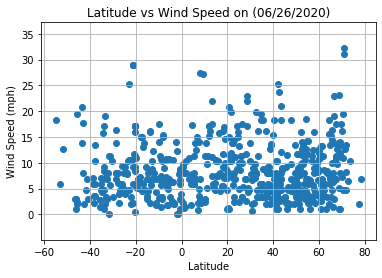

In [16]:
x_axis=clean_city_data["Lat"]
y_axis=clean_city_data["Wind Speed"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs Wind Speed on ({current_date})")
plt.ylim(min(clean_city_data["Wind Speed"])-5,max(clean_city_data["Wind Speed"])+5)
plt.grid(True)

plt.savefig("..\output_data\lat_windspeed.png")

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg_plot(x_axis,y_axis,x_label,y_label,title,y_lim_min,y_lim_max,line_x,line_y,filename):
    
    # Linear Regression calculation
    slope, intercept, r_value, p_value, std_err = linregress(x_axis,y_axis)
    
    # Linear Regression line equation
    lin_eq=f"y = {round(slope,2)}*x + {round(intercept,2)}"
    
    #print(slope, intercept, r_value, p_value, std_err)

    #Create Scatter plot for x_axis and y_axis provided as parameter in function call
    plt.scatter(x_axis,y_axis)

    # Setting x-lable, y-label, title and y-limit for plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.ylim(y_lim_min,y_lim_max)
    plt.grid(True)

    #Plotting the linear regression line on the plot
    plt.plot(x_axis,((slope*x_axis)+intercept),color="red")

    #Adding the linear regression line eqation
    _=plt.annotate(lin_eq,(line_x,line_y),color="red",fontsize=15)

    plt.savefig(filename)
    
    

In [18]:
# Create Northern and Southern Hemisphere DataFrames
city_north_hem_weather=clean_city_data[clean_city_data["Lat"]>=0]
city_south_hem_weather=clean_city_data[clean_city_data["Lat"]<0]


In [19]:
city_north_hem_weather.sort_values("Lat").head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
55,Thinadhoo,0.53,72.93,84.94,72.0,60.0,9.78,MV,1593153776
366,Muisne,0.60,-80.03,74.84,87.0,100.0,9.13,EC,1593153948
490,Sungai Raya,0.70,108.90,81.09,85.0,97.0,2.30,ID,1593154089
217,Amapá,1.00,-52.00,68.45,98.0,17.0,1.21,BR,1593154050
11,Cocobeach,1.00,9.58,75.20,83.0,40.0,8.05,GA,1593154069


In [20]:
city_south_hem_weather.sort_values("Lat",ascending=False)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
484,Pontianak,-0.03,109.33,89.44,58.0,20.0,2.84,ID,1593154061
445,Tucumã,-0.18,-50.05,75.54,91.0,100.0,3.87,BR,1593154087
0,Hithadhoo,-0.60,73.08,84.85,70.0,79.0,8.43,MV,1593153683
193,Mbarara,-0.61,30.65,72.70,57.0,0.0,6.73,UG,1593154049
161,Kyotera,-0.62,31.52,77.41,46.0,0.0,8.79,UG,1593154075
...,...,...,...,...,...,...,...,...,...
160,Kaitangata,-46.28,169.85,44.01,71.0,100.0,1.01,NZ,1593153958
163,Bluff,-46.60,168.33,39.00,83.0,100.0,3.00,NZ,1593153947
394,Río Gallegos,-51.62,-69.22,26.60,92.0,67.0,12.75,AR,1593153964
50,Punta Arenas,-53.15,-70.92,24.80,85.0,70.0,5.82,CL,1593153806


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

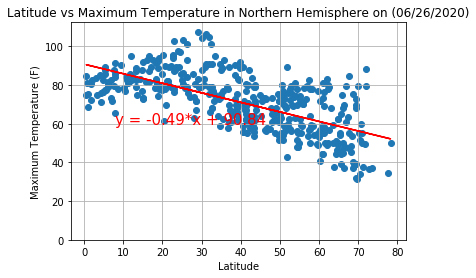

In [21]:
x_axis=city_north_hem_weather["Lat"]
y_axis=city_north_hem_weather["Max Temp"]

x_label="Latitude"
y_label="Maximum Temperature (F)"
title=f"Latitude vs Maximum Temperature in Northern Hemisphere on ({current_date})"
y_lim_min=0
y_lim_max=max(city_north_hem_weather["Max Temp"])+5

line_x=8
line_y=60

filename="..\output_data\lat_maxtemp_north_linregress.png"

linear_reg_plot(x_axis,y_axis,x_label,y_label,title,y_lim_min,y_lim_max,line_x,line_y,filename)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

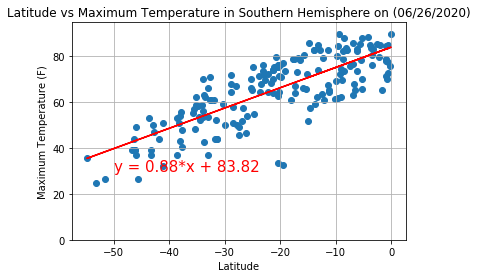

In [22]:
x_axis=city_south_hem_weather["Lat"]
y_axis=city_south_hem_weather["Max Temp"]

x_label="Latitude"
y_label="Maximum Temperature (F)"
title=f"Latitude vs Maximum Temperature in Southern Hemisphere on ({current_date})"
y_lim_min=0
y_lim_max=max(city_south_hem_weather["Max Temp"])+5

line_x=-50
line_y=30

filename="..\output_data\lat_maxtemp_south_linregress.png"

linear_reg_plot(x_axis,y_axis,x_label,y_label,title,y_lim_min,y_lim_max,line_x,line_y,filename)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

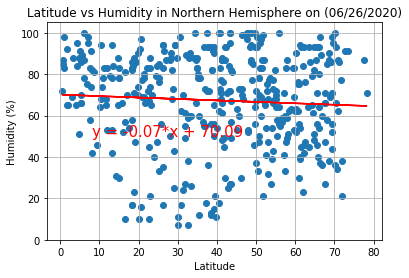

In [23]:
x_axis=city_north_hem_weather["Lat"]
y_axis=city_north_hem_weather["Humidity"]

x_label="Latitude"
y_label="Humidity (%)"
title=f"Latitude vs Humidity in Northern Hemisphere on ({current_date})"
y_lim_min=0
y_lim_max=max(city_north_hem_weather["Humidity"])+5

line_x=8
line_y=50

filename="..\output_data\lat_humidity_north_linregress.png"

linear_reg_plot(x_axis,y_axis,x_label,y_label,title,y_lim_min,y_lim_max,line_x,line_y,filename)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

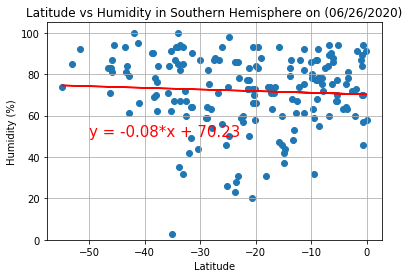

In [24]:
x_axis=city_south_hem_weather["Lat"]
y_axis=city_south_hem_weather["Humidity"]

x_label="Latitude"
y_label="Humidity (%)"
title=f"Latitude vs Humidity in Southern Hemisphere on ({current_date})"
y_lim_min=0
y_lim_max=max(city_south_hem_weather["Humidity"])+5

line_x=-50
line_y=50

filename="..\output_data\lat_humidity_south_linregress.png"

linear_reg_plot(x_axis,y_axis,x_label,y_label,title,y_lim_min,y_lim_max,line_x,line_y,filename)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

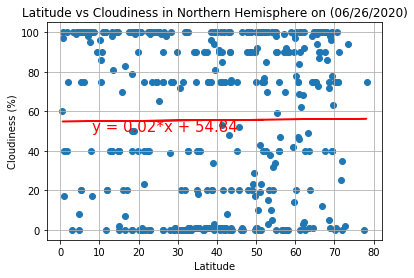

In [25]:
x_axis=city_north_hem_weather["Lat"]
y_axis=city_north_hem_weather["Cloudiness"]

x_label="Latitude"
y_label="Cloudiness (%)"
title=f"Latitude vs Cloudiness in Northern Hemisphere on ({current_date})"
y_lim_min=min(city_north_hem_weather["Cloudiness"])-5
y_lim_max=max(city_north_hem_weather["Cloudiness"])+5

line_x=8
line_y=50

filename="..\output_data\lat_cloudiness_north_linregress.png"

linear_reg_plot(x_axis,y_axis,x_label,y_label,title,y_lim_min,y_lim_max,line_x,line_y,filename)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

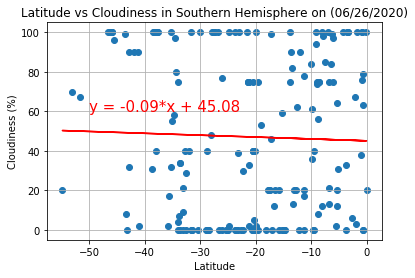

In [26]:
x_axis=city_south_hem_weather["Lat"]
y_axis=city_south_hem_weather["Cloudiness"]

x_label="Latitude"
y_label="Cloudiness (%)"
title=f"Latitude vs Cloudiness in Southern Hemisphere on ({current_date})"
y_lim_min=min(city_south_hem_weather["Cloudiness"])-5
y_lim_max=max(city_south_hem_weather["Cloudiness"])+5

line_x=-50
line_y=60

filename="..\output_data\lat_cloudiness_south_linregress.png"

linear_reg_plot(x_axis,y_axis,x_label,y_label,title,y_lim_min,y_lim_max,line_x,line_y,filename)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

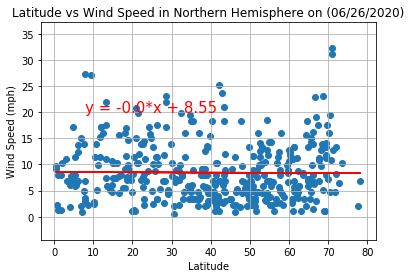

In [27]:
x_axis=city_north_hem_weather["Lat"]
y_axis=city_north_hem_weather["Wind Speed"]

x_label="Latitude"
y_label="Wind Speed (mph)"
title=f"Latitude vs Wind Speed in Northern Hemisphere on ({current_date})"
y_lim_min=min(city_north_hem_weather["Wind Speed"])-5
y_lim_max=max(city_north_hem_weather["Wind Speed"])+5

line_x=8
line_y=20

filename="..\output_data\lat_windspeed_north_linregress.png"

linear_reg_plot(x_axis,y_axis,x_label,y_label,title,y_lim_min,y_lim_max,line_x,line_y,filename)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

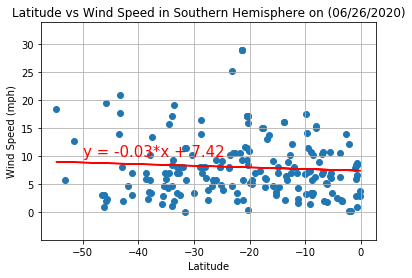

In [28]:
x_axis=city_south_hem_weather["Lat"]
y_axis=city_south_hem_weather["Wind Speed"]

x_label="Latitude"
y_label="Wind Speed (mph)"
title=f"Latitude vs Wind Speed in Southern Hemisphere on ({current_date})"
y_lim_min=min(city_south_hem_weather["Wind Speed"])-5
y_lim_max=max(city_south_hem_weather["Wind Speed"])+5

line_x=-50
line_y=10

filename="..\output_data\lat_windspeed_south_linregress.png"

linear_reg_plot(x_axis,y_axis,x_label,y_label,title,y_lim_min,y_lim_max,line_x,line_y,filename)